In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
new_col=[1]*100
new_col2=[1]*110
idx=0
col='w0'
train1=pd.read_csv('trainData1.csv',header=None)
train1.insert(loc=idx,value=new_col,column=col)
train2=pd.read_csv('trainData2.csv',header=None)
train2.insert(loc=idx,value=new_col,column=col)
train3=pd.read_csv('trainData3.csv',header=None)
train3.insert(loc=idx,value=new_col,column=col)
train4=pd.read_csv('trainData4.csv',header=None)
train4.insert(loc=idx,value=new_col,column=col)
train5=pd.read_csv('trainData5.csv',header=None)
train5.insert(loc=idx,value=new_col,column=col)
train6=pd.read_csv('trainData6.csv',header=None)
train6.insert(loc=idx,value=new_col,column=col)
train7=pd.read_csv('trainData7.csv',header=None)
train7.insert(loc=idx,value=new_col,column=col)
train8=pd.read_csv('trainData8.csv',header=None)
train8.insert(loc=idx,value=new_col,column=col)
train9=pd.read_csv('trainData9.csv',header=None)
train9.insert(loc=idx,value=new_col,column=col)
train10=pd.read_csv('trainData10.csv',header=None)
train10.insert(loc=idx,value=new_col,column=col)
target1=pd.read_csv('trainLabels1.csv',header=None)
target1.loc[target1[0] == 5, 0] = 1
target1.loc[target1[0] == 6, 0] = 0
target2=pd.read_csv('trainLabels2.csv',header=None)
target2.loc[target2[0] == 5, 0] = 1
target2.loc[target2[0] == 6, 0] = 0
target3=pd.read_csv('trainLabels3.csv',header=None)
target3.loc[target3[0] == 5, 0] = 1
target3.loc[target3[0] == 6, 0] = 0
target4=pd.read_csv('trainLabels4.csv',header=None)
target4.loc[target4[0] == 5, 0] = 1
target4.loc[target4[0] == 6, 0] = 0
target5=pd.read_csv('trainLabels5.csv',header=None)
target5.loc[target5[0] == 5, 0] = 1
target5.loc[target5[0] == 6, 0] = 0
target6=pd.read_csv('trainLabels6.csv',header=None)
target6.loc[target6[0] == 5, 0] = 1
target6.loc[target6[0] == 6, 0] = 0
target7=pd.read_csv('trainLabels7.csv',header=None)
target7.loc[target7[0] == 5, 0] = 1
target7.loc[target7[0] == 6, 0] = 0
target8=pd.read_csv('trainLabels8.csv',header=None)
target8.loc[target8[0] == 5, 0] = 1
target8.loc[target8[0] == 6, 0] = 0
target9=pd.read_csv('trainLabels9.csv',header=None)
target9.loc[target9[0] == 5, 0] = 1
target9.loc[target9[0] == 6, 0] = 0
target10=pd.read_csv('trainLabels10.csv',header=None)
target10.loc[target10[0] == 5, 0] = 1
target10.loc[target10[0] == 6, 0] = 0
testinput=pd.read_csv('testData.csv',header=None)
testinput.insert(loc=idx,value=new_col2,column=col)
testTarget=pd.read_csv('testLabels.csv',header=None)
testTarget.loc[testTarget[0] == 5, 0] = 1
testTarget.loc[testTarget[0] == 6, 0] = 0

In [3]:
train=[train1,train2,train3,train4,train5,train6,train7,train8,train9,train10]
labels=[target1,target2,target3,target4,target5,target6,target7,target8,target9,target10]

In [4]:
def sigmod(x):
    return 1/(1+np.exp(-x))

def newton_step(curr,y,x,reg):
    p=np.array(sigmod(np.dot(x,curr)),ndmin=2)
    W=np.diag((p*(1-p))[:,0])
    hessian = x.T.dot(W).dot(x)+ reg*np.eye(curr.shape[0])
    grad=x.T.dot(y-p)+reg*curr
    step=np.dot(np.linalg.inv(hessian), grad)
    beta=curr+step
    return beta

def check_convergence(beta_old, beta_new, tol, iters):
    coef_change = np.abs(beta_old - beta_new)
    return not (np.any(coef_change>tol) and iters < max_iters)

def cal_error(x,y,beta):
    prob=pd.DataFrame(sigmod(x.dot(beta)))
    prob.loc[prob[0] >= 0.5] = 1
    prob.loc[prob[0] < 0.5] = 0
    accu=accuracy_score(y,prob)
    return accu



In [5]:
def cal_mean(reg):
    
    sum_ac=0
    
    for i in range(10):
        
        
        valset=np.array(train[i])
        labels_val=np.array(labels[i])
        
        trainset=train[:i]+train[i+1:]
        labels_train=labels[:i]+labels[i+1:]
        
        dataset=np.concatenate((trainset[0],trainset[1],trainset[2],trainset[3],trainset[4],trainset[5],trainset[6],trainset[7],trainset[8]),axis=0)
        labelset=np.concatenate((labels_train[0],labels_train[1],labels_train[2],labels_train[3],labels_train[4],labels_train[5],labels_train[6],labels_train[7],labels_train[8]),axis=0)
        
        labelset_l=labelset.flatten()
        labelset_l.shape=(900,1)
        
        
        accuracy=0
        beta=np.zeros((65,1))
        
        
        for j in range(30):
            
            beta=newton_step(curr=beta,y=labelset_l,x=dataset,reg=reg)
            
        
        accuracy=cal_error(x=valset,y=labels_val,beta=beta)
        
        sum_ac += accuracy
        
        
    mean=sum_ac/10
    return mean, beta

In [12]:
w=0
error_vec=[]
beta_vec=[]
while w<3:
    w+=0.05
    result=cal_mean(w)
    error_vec.append(result[0])
    beta_vec.append(result[1])

In [10]:
y=[]
for i in range(len(error_vec)):
    y.append(float(error_vec[i]))

In [14]:
print(y.index(max(y)))
print(max(y))

172
0.8869999999999999


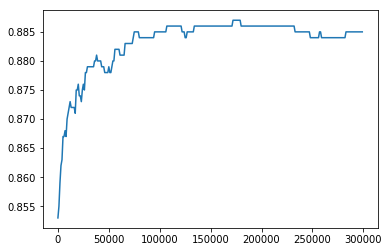

In [17]:
x=np.arange(0, 300000, 1000)
plt.plot(x,y)
plt.show()

In [12]:
best_beta= beta_vec[172]
error_test = cal_error(x=testinput,y=testTarget,beta=best_beta)

In [16]:
round(error_test,4)

0.9

In [20]:
import time
time_start=time.time()
beta0=np.zeros((65,1))
dataset=np.concatenate((train[0],train[1],train[2],train[3],train[4],train[5],train[6],train[7],train[8],train[9]),axis=0)
labelset=np.concatenate((labels[0],labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]),axis=0)

labelset_l=labelset.flatten()
labelset_l.shape=(1000,1)

for j in range(20):
            
            beta0=newton_step(curr=beta0,y=labelset_l,x=dataset,reg=172000)
time_end=time.time()
print('totally cost',time_end-time_start)

totally cost 0.583730936050415


In [50]:
b=beta_vec[172].reshape(1,65).flatten()

In [51]:
b

array([ 0.00119815, -0.0047883 ,  0.0055751 ,  0.0361309 ,  0.01153084,
        0.03006301,  0.06610902,  0.01332119,  0.00196262,  0.01232811,
        0.01689479,  0.04108779, -0.00241884,  0.02161624,  0.04891707,
        0.00681218, -0.00880535,  0.00074047,  0.022336  ,  0.01251644,
       -0.01881764,  0.01401588, -0.00362488, -0.00726108, -0.00936128,
        0.00854155,  0.01332021,  0.00014268,  0.02913598,  0.02585164,
        0.00699949, -0.01087864,  0.0024594 ,  0.0054138 , -0.01075832,
       -0.03739881, -0.02210655, -0.00294714, -0.01423589, -0.00388106,
       -0.00908108, -0.00399116, -0.00700294, -0.08400236, -0.04440286,
        0.00086372,  0.00152905, -0.02430331, -0.00053034,  0.00179835,
       -0.01260738, -0.02789877, -0.02648854,  0.02665574, -0.01931856,
       -0.04237307, -0.00045988, -0.00778829, -0.00982074,  0.05074808,
        0.02137919, -0.0233653 , -0.04098693, -0.01306087, -0.0043423 ])

In [3]:
def newton_step2(curr,y,x):
    p=np.array(sigmod(np.dot(x,curr)),ndmin=2)
    W=np.diag((p*(1-p))[:,0])
    hessian = x.T.dot(W).dot(x)
    grad=x.T.dot(y-p)
    step=np.dot(np.linalg.inv(hessian), grad)
    beta=curr+step
    return beta


In [9]:
beta0=np.zeros((65,1))
dataset=np.concatenate((train[0],train[1],train[2],train[3],train[4],train[5],train[6],train[7],train[8],train[9]),axis=0)
labelset=np.concatenate((labels[0],labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8],labels[9]),axis=0)

In [11]:
labelset_l=labelset.flatten()
labelset_l.shape=(1000,1)

In [16]:
aa=[]

In [30]:
beta0=np.zeros((65,1))
aa=[]
for j in range(50):
            
            beta0=newton_step2(curr=beta0,y=labelset_l,x=dataset)
            aa.append(beta0[7])

In [31]:
aa

[array([0.00870426]),
 array([0.02369068]),
 array([0.03673077]),
 array([0.04347705]),
 array([0.04481001]),
 array([0.04485624]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array([0.0448563]),
 array(